In [92]:
## Standard libraries
import os
import math
import numpy as np
import time

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

## Progress bar
from tqdm.auto import tqdm

/var/folders/f2/gq8xgm9x491cqwtct_tgpy0h0000gn/T/ipykernel_3991/2052077244.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export


In [93]:
import jax
import jax.numpy as jnp
print("Using jax", jax.__version__)

Using jax 0.4.26


In [94]:
a = jnp.zeros((2,5), dtype=jnp.float32)
print(a)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [95]:
b = jnp.arange(6)
print(b)

[0 1 2 3 4 5]


In [96]:
b.__class__

jaxlib.xla_extension.ArrayImpl

In [97]:
b.device

<bound method ArrayImpl.device of Array([0, 1, 2, 3, 4, 5], dtype=int32)>

In [98]:
b_cpu = jax.device_get(b)
print(b_cpu.__class__)

<class 'numpy.ndarray'>


In [99]:
b_gpu = jax.device_put(b_cpu)
print(f'Device put: {b_gpu.__class__} on {b_gpu.devices()}')

Device put: <class 'jaxlib.xla_extension.ArrayImpl'> on {METAL(id=0)}


In [100]:
b_cpu + b_gpu

Array([ 0,  2,  4,  6,  8, 10], dtype=int32)

In [101]:
b_new = b.at[0].set(1)
print('Original array:', b)
print('Changed array:', b_new)

Original array: [0 1 2 3 4 5]
Changed array: [1 1 2 3 4 5]


In [102]:
rng = jax.random.PRNGKey(42)

In [103]:
jax_random_number_1 = jax.random.normal(rng)
jax_random_number_2 = jax.random.normal(rng)
print('JAX - Random number 1:', jax_random_number_1)
print('JAX - Random number 2:', jax_random_number_2)

JAX - Random number 1: -0.9350606
JAX - Random number 2: -0.9350606


In [104]:
np.random.seed(42)
np_random_number_1 = np.random.normal()
np_random_number_2 = np.random.normal()
print('NumPy - Random number 1:', np_random_number_1)
print('NumPy - Random number 2:', np_random_number_2)

NumPy - Random number 1: 0.4967141530112327
NumPy - Random number 2: -0.13826430117118466


In [105]:
rng, subkey1, subkey2 = jax.random.split(rng,num=3) 

In [106]:
#no splitting. I get the same numbers always
jax_random_number_0 = jax.random.normal(rng)
jax_random_number_1 = jax.random.normal(subkey1)
jax_random_number_2 = jax.random.normal(subkey2)
print('JAX new - Random number 0:', jax_random_number_0)
print('JAX new - Random number 1:', jax_random_number_1)
print('JAX new - Random number 2:', jax_random_number_2)

JAX new - Random number 0: -0.5484217
JAX new - Random number 1: -0.18267898
JAX new - Random number 2: 0.7080024


In [107]:
#every time i run this cell i well get different values
rng, subkey1, subkey2 = jax.random.split(rng,num=3) 
jax_random_number_0 = jax.random.normal(rng)
jax_random_number_1 = jax.random.normal(subkey1)
jax_random_number_2 = jax.random.normal(subkey2)
print('JAX new - Random number 0:', jax_random_number_0)
print('JAX new - Random number 1:', jax_random_number_1)
print('JAX new - Random number 2:', jax_random_number_2)

JAX new - Random number 0: -0.26986617
JAX new - Random number 1: -0.4367844
JAX new - Random number 2: -0.082964614


## Tutorial 101

In [108]:
x = jnp.arange(10)
x

Array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [109]:
long_vector = jnp.arange(int(1e8))
long_vector.__class__

jaxlib.xla_extension.ArrayImpl

In [110]:
%timeit jnp.dot(long_vector, long_vector).block_until_ready()

4.46 ms ± 488 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [111]:
cpu_long_vector = jax.device_get(long_vector)
cpu_long_vector.__class__

numpy.ndarray

In [112]:
%timeit jnp.dot(long_vector, long_vector).block_until_ready()

3.27 ms ± 616 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [113]:
def sum_of_squares(x):
    return jnp.sum(x**2)

In [114]:
sum_of_squares_dx = jax.grad(sum_of_squares)
x = jnp.asarray([1.0,2.0,3.0,4.0])
print(x.__class__)
print(sum_of_squares(x))
print(sum_of_squares_dx(x))

<class 'jaxlib.xla_extension.ArrayImpl'>
30.0
[2. 4. 6. 8.]


In [115]:
def sum_squared_error(x,y):
    return jnp.sum((x-y)**2)
sum_squared_error_dx = jax.grad(sum_squared_error)
y = jnp.asarray([1.1,2.1,3.1,4.1])
print(sum_squared_error(x,y))
print(sum_squared_error_dx(x,y))

0.039999947
[-0.20000005 -0.19999981 -0.19999981 -0.19999981]


In [116]:
jax.grad(sum_squared_error, argnums=(0, 1))(x, y)  # Find gradient wrt both x & y

(Array([-0.20000005, -0.19999981, -0.19999981, -0.19999981], dtype=float32),
 Array([0.20000005, 0.19999981, 0.19999981, 0.19999981], dtype=float32))

In [117]:
def simple_graph(x):
    x = x + 2
    x = x ** 2
    x = x + 3
    y = x.mean()
    return y

In [118]:
inp = jnp.arange(3, dtype=jnp.float32)
inp.__class__

jaxlib.xla_extension.ArrayImpl

In [119]:
print('Input', inp)
print('Output', simple_graph(inp))

Input [0. 1. 2.]
Output 12.666667


In [120]:
jax.make_jaxpr(simple_graph)(inp)

{ lambda ; a:f32[3]. let
    b:f32[3] = add a 2.0
    c:f32[3] = integer_pow[y=2] b
    d:f32[3] = add c 3.0
    e:f32[] = reduce_sum[axes=(0,)] d
    f:f32[] = div e 3.0
  in (f,) }

In [121]:
global_list = []

# Invalid function with side-effect
def norm(x):
    global_list.append(x) #does not contain any operation for this one
    x = x ** 2
    n = x.sum()
    n = jnp.sqrt(n)
    return n

jax.make_jaxpr(norm)(inp)

{ lambda ; a:f32[3]. let
    b:f32[3] = integer_pow[y=2] a
    c:f32[] = reduce_sum[axes=(0,)] b
    d:f32[] = sqrt c
  in (d,) }

In [122]:
grad_function = jax.grad(simple_graph)
gradients = grad_function(inp)
print('Gradient', gradients)

Gradient [1.3333334 2.        2.6666667]


In [123]:
jax.make_jaxpr(grad_function)(inp)

{ lambda ; a:f32[3]. let
    b:f32[3] = add a 2.0
    c:f32[3] = integer_pow[y=2] b
    d:f32[3] = integer_pow[y=1] b
    e:f32[3] = mul 2.0 d
    f:f32[3] = add c 3.0
    g:f32[] = reduce_sum[axes=(0,)] f
    _:f32[] = div g 3.0
    h:f32[] = div 1.0 3.0
    i:f32[3] = broadcast_in_dim[broadcast_dimensions=() shape=(3,)] h
    j:f32[3] = mul i e
  in (j,) }

In [124]:
# when we just want to get the value
val_grad_function = jax.value_and_grad(simple_graph)
val_grad_function(inp)

(Array(12.666667, dtype=float32),
 Array([1.3333334, 2.       , 2.6666667], dtype=float32))

In [125]:
jitted_function = jax.jit(simple_graph)

In [126]:
rng, normal_rng = jax.random.split(rng)


In [127]:
large_input = jax.random.normal(normal_rng, (1000,))
_ = jitted_function(large_input)

In [128]:
%%timeit
simple_graph(large_input).block_until_ready()

787 µs ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [129]:
%%timeit
jitted_function(large_input).block_until_ready()

279 µs ± 11.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [130]:
jitted_grad_function = jax.jit(grad_function)
_ = jitted_grad_function(large_input) 

In [131]:
%%timeit
grad_function(large_input).block_until_ready()

3.35 ms ± 65.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [132]:
%%timeit
jitted_grad_function(large_input).block_until_ready()

238 µs ± 5.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [133]:
from flax import linen as nn


In [134]:
class SimpleClassifier(nn.Module):
    num_hidden : int   # Number of hidden neurons
    num_outputs : int  # Number of output neurons

    def setup(self):
        # Create the modules we need to build the network
        # nn.Dense is a linear layer
        self.linear1 = nn.Dense(features=self.num_hidden)
        self.linear2 = nn.Dense(features=self.num_outputs)

    def __call__(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = nn.tanh(x)
        x = self.linear2(x)
        return x

In [136]:
#simpler way of creating a simple classifier
class SimpleClassifierCompact(nn.Module):
    num_hidden : int  
    num_outputs : int

    @nn.compact  # Tells Flax to look for defined submodules
    def __call__(self, x):
        # Perform the calculation of the model to determine the prediction
        # while defining necessary layers
        x = nn.Dense(features=self.num_hidden)(x)
        x = nn.tanh(x)
        x = nn.Dense(features=self.num_outputs)(x)
        return x

In [137]:
#creating instance of the model
model = SimpleClassifier(num_hidden=8,num_outputs=1)
print(model)

SimpleClassifier(
    # attributes
    num_hidden = 8
    num_outputs = 1
)


In [141]:
rng, inp_rng, init_rng = jax.random.split(rng,3)

In [145]:

inp = jax.random.normal(inp_rng,(8,2))
inp

Array([[-1.3439181 ,  0.6429476 ],
       [-1.5676413 , -0.44147977],
       [ 0.49920234, -0.36310518],
       [ 0.8277361 , -0.02077403],
       [ 0.4741161 , -0.35662487],
       [-2.3667781 ,  0.9393318 ],
       [ 0.16964886,  0.37653938],
       [-0.5358841 ,  0.19641948]], dtype=float32)

In [149]:
params = model.init(init_rng,inp)
print(params)

{'params': {'linear1': {'kernel': Array([[ 1.024376  , -1.052183  , -0.1483135 ,  1.2987319 ,  0.3865956 ,
        -1.0295712 , -0.2703718 , -0.12079524],
       [-0.52960914,  0.7966237 ,  0.89103186, -1.1658981 ,  0.95768267,
         0.7459659 ,  0.5387747 , -1.2564553 ]], dtype=float32), 'bias': Array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)}, 'linear2': {'kernel': Array([[ 0.43645597],
       [-0.39781412],
       [ 0.06989034],
       [-0.08034126],
       [ 0.6816833 ],
       [ 0.48783168],
       [ 0.67914635],
       [ 0.18095477]], dtype=float32), 'bias': Array([0.], dtype=float32)}}}


In [155]:
#apply the model on an input
#one output neuron in the model for all 8 batch elements
model.apply(params,inp)

Array([[ 0.17609759],
       [-0.53406435],
       [-0.1307149 ],
       [ 0.19904903],
       [-0.13222754],
       [ 0.20863602],
       [ 0.32784808],
       [-0.00445377]], dtype=float32)

In [157]:
import torch.utils.data as data
#The dataset class provides an uniform interface to access the training/test data, while the data loader makes sure to efficiently 
#load and stack the data points from the dataset into batches during training.



In [158]:
class XORDataset(data.Dataset):

    def __init__(self, size, seed, std=0.1):
        """
        Inputs:
            size - Number of data points we want to generate
            seed - The seed to use to create the PRNG state with which we want to generate the data points
            std - Standard deviation of the noise (see generate_continuous_xor function)
        """
        super().__init__()
        self.size = size
        self.np_rng = np.random.RandomState(seed=seed)
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x=y, the label is 0.
        data = self.np_rng.randint(low=0, high=2, size=(self.size, 2)).astype(np.float32)
        label = (data.sum(axis=1) == 1).astype(np.int32)
        # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
        data += self.np_rng.normal(loc=0.0, scale=self.std, size=data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size

    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

In [159]:
dataset = XORDataset(size=200,seed=42)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 200
Data point 0: (array([-0.06800247,  1.0232254 ], dtype=float32), 1)


In [160]:
def visualize_samples(data, label):
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

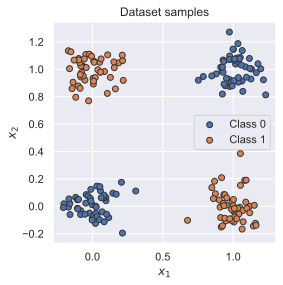

In [161]:
visualize_samples(dataset.data, dataset.label)
plt.show()

In [164]:
# This collate function is taken from the JAX tutorial with PyTorch Data Loading
# https://jax.readthedocs.io/en/latest/notebooks/Neural_Network_and_Data_Loading.html
def numpy_collate(batch):
    if isinstance(batch[0], np.ndarray):
        return np.stack(batch)
    elif isinstance(batch[0], (tuple,list)):
        transposed = zip(*batch)
        return [numpy_collate(samples) for samples in transposed]
    else:
        return np.array(batch)

data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True, collate_fn=numpy_collate)

In [165]:
# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, this will return a different batch every time we run this cell
# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."
data_inputs, data_labels = next(iter(data_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs (8, 2) 
 [[ 0.05298042  0.14415686]
 [-0.08984147  1.049192  ]
 [-0.16275424  1.0048085 ]
 [-0.06506426  0.95128745]
 [-0.02750517  0.7698079 ]
 [ 1.0013002   1.1453534 ]
 [ 0.8484809   0.13668743]
 [ 0.06141667  1.0757508 ]]
Data labels (8,) 
 [0 1 1 1 1 0 1 1]


In [166]:
import optax

In [167]:
optimizer = optax.sgd(learning_rate=0.1)

To simplify this step and bundle important parts of the training procedure, Flax offers the flax.training package. As a first step, we can create a TrainState which bundles the parameters, the optimizer, and the forward step of the model:

In [168]:
from flax.training import train_state
model_state = train_state.TrainState.create(apply_fn = model.apply, params = params, tx = optimizer)

In [169]:
def calculate_loss_acc(state, params, batch):
    data_input, labels = batch
    # Obtain the logits and predictions of the model for the input data
    logits = state.apply_fn(params, data_input).squeeze(axis=-1)
    pred_labels = (logits > 0).astype(jnp.float32)
    # Calculate the loss and accuracy
    loss = optax.sigmoid_binary_cross_entropy(logits, labels).mean()
    acc = (pred_labels == labels).mean()
    return loss, acc

In [176]:
batch = next(iter(data_loader))
calculate_loss_acc(model_state, params, batch)

(Array(0.54508233, dtype=float32), Array(0.875, dtype=float32))

In [177]:
@jax.jit  # Jit the function for efficiency
def train_step(state, batch):
    # Gradient function
    grad_fn = jax.value_and_grad(calculate_loss_acc,  # Function to calculate the loss
                                 argnums=1,  # Parameters are second argument of the function
                                 has_aux=True  # Function has additional outputs, here accuracy
                                )
    # Determine gradients for current model, parameters and batch
    (loss, acc), grads = grad_fn(state, state.params, batch)
    # Perform parameter update with gradients and optimizer
    state = state.apply_gradients(grads=grads)
    # Return state and any other value we might want
    return state, loss, acc

In [178]:
@jax.jit  # Jit the function for efficiency
def eval_step(state, batch):
    # Determine the accuracy
    _, acc = calculate_loss_acc(state, state.params, batch)
    return acc


In [179]:
train_dataset = XORDataset(size=2500, seed=42)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True, collate_fn=numpy_collate)


In [180]:
def train_model(state, data_loader, num_epochs=100):
    # Training loop
    for epoch in tqdm(range(num_epochs)):
        for batch in data_loader:
            state, loss, acc = train_step(state, batch)
            # We could use the loss and accuracy for logging here, e.g. in TensorBoard
            # For simplicity, we skip this part here
    return state

In [181]:
trained_model_state = train_model(model_state, train_data_loader, num_epochs=100)


  0%|          | 0/100 [00:00<?, ?it/s]

In [186]:
test_dataset = XORDataset(size=500, seed=123)
# drop_last -> Don't drop the last batch although it is smaller than 128
test_data_loader = data.DataLoader(test_dataset,
                                   batch_size=128,
                                   shuffle=False,
                                   drop_last=False,
                                   collate_fn=numpy_collate)

In [187]:
def eval_model(state, data_loader):
    all_accs, batch_sizes = [], []
    for batch in data_loader:
        batch_acc = eval_step(state, batch)
        all_accs.append(batch_acc)
        batch_sizes.append(batch[0].shape[0])
    # Weighted average since some batches might be smaller
    acc = sum([a*b for a,b in zip(all_accs, batch_sizes)]) / sum(batch_sizes)
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

In [188]:
eval_model(trained_model_state, test_data_loader)


Accuracy of the model: 100.00%


Once we have trained the model, we might want to do multiple application of the same model and parameters. It can get a bit annoying to always write model.apply(params, ...) and keep track of the model and parameters separately. To prevent this, Flax’s module can be bound to specific parameters to simplify our application. Specifically, we can bind the instance model of our SimpleClassifier class to our trained parameter as follows:

In [189]:
trained_model = model.bind(trained_model_state.params)

In [190]:
data_input, labels = next(iter(data_loader))
out = trained_model(data_input)  # No explicit parameter passing necessary anymore
out.shape

(8, 1)

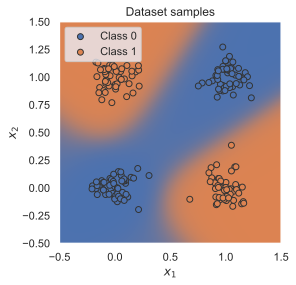

In [191]:
def visualize_classification(model, data, label):
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    fig = plt.figure(figsize=(4,4), dpi=500)
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # Let's make use of a lot of operations we have learned above
    c0 = np.array(to_rgba("C0"))
    c1 = np.array(to_rgba("C1"))
    x1 = jnp.arange(-0.5, 1.5, step=0.01)
    x2 = jnp.arange(-0.5, 1.5, step=0.01)
    xx1, xx2 = jnp.meshgrid(x1, x2, indexing='ij')  # Meshgrid function as in numpy
    model_inputs = np.stack([xx1, xx2], axis=-1)
    logits = model(model_inputs)
    preds = nn.sigmoid(logits)
    output_image = (1 - preds) * c0[None,None] + preds * c1[None,None]  # Specifying "None" in a dimension creates a new one
    output_image = jax.device_get(output_image)  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin='lower', extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)
    return fig

_ = visualize_classification(trained_model, dataset.data, dataset.label)
plt.show()

In [192]:
def simple_linear(x, w, b):
    # We could already vectorize this function with matmul, but as an example,
    # let us use a non-vectorized function with same output
    return (x[:,None] * w).sum(axis=0) + b

In [193]:
# Example inputs
rng, x_rng, w_rng, b_rng = jax.random.split(rng, 4)
x_in = jax.random.normal(x_rng, (4,))
w_in = jax.random.normal(w_rng, (4, 3))
b_in = jax.random.normal(b_rng, (3,))

simple_linear(x_in, w_in, b_in)

Array([ 2.3817453, -2.6175919,  1.6640418], dtype=float32)

In [194]:
vectorized_linear = jax.vmap(simple_linear,
                             in_axes=(0, None, None),  # Which axes to vectorize for each input
                             out_axes=0  # Which axes to map to in the output
                            )

In [195]:
x_vec_in = jnp.stack([x_in]*5, axis=0)

vectorized_linear(x_vec_in, w_in, b_in)

Array([[ 2.3817453, -2.6175919,  1.6640418],
       [ 2.3817453, -2.6175919,  1.6640418],
       [ 2.3817453, -2.6175919,  1.6640418],
       [ 2.3817453, -2.6175919,  1.6640418],
       [ 2.3817453, -2.6175919,  1.6640418]], dtype=float32)

In [197]:
parameters = jax.tree.leaves(model_state.params)
print('We have parameters with the following shapes:', ', '.join([str(p.shape) for p in parameters]))
print('Overall parameter count:', sum([np.prod(p.shape) for p in parameters]))

We have parameters with the following shapes: (8,), (2, 8), (1,), (8, 1)
Overall parameter count: 33
